# Example of Jupyter notebook for master's thesis

Author: Luc Hens

Date: 28 October 2024

This notebook imports data for the real effective exchange rate (variable PX.REX.REER) and export volume (variable TX.QTY.MRCH.XD.WD) for Singapore (SGP) from the World Bank site, stores the data in a data frame, makes a scatter plot, and adds the simple regression line.

## Import data:
Import data from World Bank (data.worldbank.org):

In [1]:
import pandas as pd    # imports the pandas library and assigns it the alias pd

https://stackoverflow.com/questions/70575998/getting-data-from-world-bank-api-using-pandas

In [2]:
import requests
import pandas as pd

url = 'http://api.worldbank.org/v2/country/%s/indicator/PX.REX.REER?format=json'
countries = ["SGP"]
    
my_values = []
for country in countries:
    data = requests.get(url %country).json()

    try:
        for d in data[1]:
            my_values.append({
                'country':d['country']['value'],
                'date':d['date'],
                'value':d['value']
            })
    except Exception as err:
        print(f'[ERROR] country ==> {country} error ==> {err}')

df1 = pd.DataFrame(my_values).sort_values(['country', 'date'], ascending=True)

In [3]:
df1 = df1.rename(
    columns={
        'value': 'px_rx_reer'})

print(df1.dtypes)

country        object
date           object
px_rx_reer    float64
dtype: object


In [4]:
url = 'http://api.worldbank.org/v2/country/%s/indicator/TX.QTY.MRCH.XD.WD?format=json'
countries = ["SGP"]
    
my_values = []
for country in countries:
    data = requests.get(url %country).json()

    try:
        for d in data[1]:
            my_values.append({
                'country':d['country']['value'],
                'date':d['date'],
                'value':d['value']
            })
    except Exception as err:
        print(f'[ERROR] country ==> {country} error ==> {err}')

df2 = pd.DataFrame(my_values).sort_values(['country', 'date'], ascending=True)

In [5]:
df2 = df2.rename(
    columns={
        'value': 'tx_qty_mrch_xd_wd'})

print(df2.dtypes)

country               object
date                  object
tx_qty_mrch_xd_wd    float64
dtype: object


Merge the two dataframes:

In [6]:
df3 = pd.merge(df1, df2, on='date')

In [7]:
df3.drop(['country_y'], axis='columns', inplace=True)

In [8]:
df3 = df3.rename(
    columns={
        'country_x': 'country'})

print(df3)

      country  date  px_rx_reer  tx_qty_mrch_xd_wd
0   Singapore  1974         NaN                NaN
1   Singapore  1975         NaN                NaN
2   Singapore  1976         NaN                NaN
3   Singapore  1977         NaN                NaN
4   Singapore  1978         NaN                NaN
5   Singapore  1979   96.260010                NaN
6   Singapore  1980   95.915436           3.979533
7   Singapore  1981  101.421962           4.106214
8   Singapore  1982  106.362508           4.235257
9   Singapore  1983  107.682496           4.596349
10  Singapore  1984  109.439012           5.334108
11  Singapore  1985  106.738380           5.336224
12  Singapore  1986   91.015549           6.045704
13  Singapore  1987   85.422738           7.247033
14  Singapore  1988   83.739994           9.547919
15  Singapore  1989   87.512648          10.644158
16  Singapore  1990   93.038960          11.583671
17  Singapore  1991   96.062144          13.067291
18  Singapore  1992   97.728019

## Make a scatter plot:
Make a scatterplot of real effective exchange rate (x-axis) vs volume of exports (y-axis):

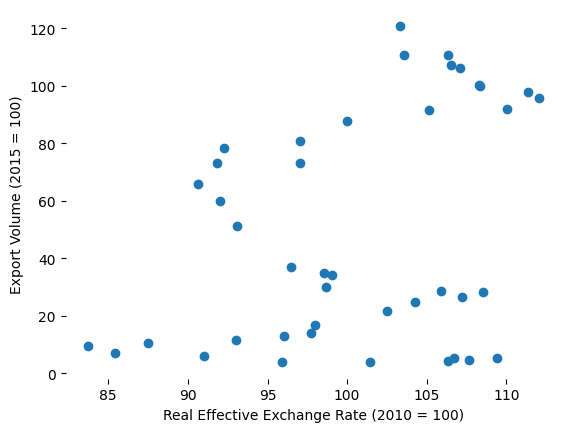

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.box(False)             # get rid of the box
plt.xlabel("Real Effective Exchange Rate (2010 = 100)")  # add label to x-axis
plt.ylabel("Export Volume (2015 = 100)")  # add label to y-axis
plt.scatter(df3.px_rx_reer,df3.tx_qty_mrch_xd_wd)

Add a line of best fit to the scatter plot:

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
import statsmodels.formula.api as smf

# Fit regression model:
results = smf.ols('df3.tx_qty_mrch_xd_wd ~ df3.px_rx_reer', data=df3).fit()

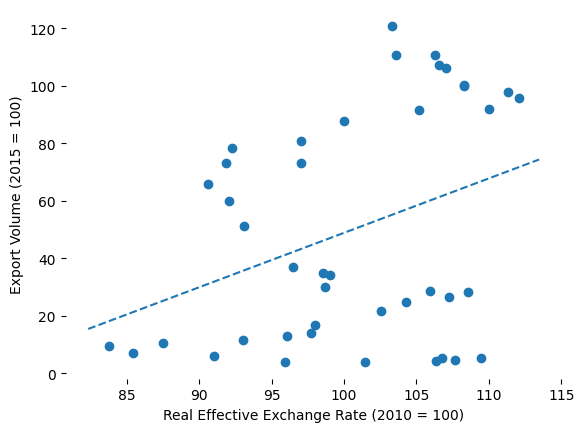

In [11]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

plt.box(False)             # get rid of the box
plt.xlabel("Real Effective Exchange Rate (2010 = 100)")  # add label to x-axis
plt.ylabel("Export Volume (2015 = 100)")  # add label to y-axis
plt.scatter(df3.px_rx_reer,df3.tx_qty_mrch_xd_wd)
abline(results.params.iloc[1],results.params.iloc[0])     # add line y=a*x+b  (a = slope, b = intercept)

In [12]:
# Inspect the results:
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     df3.tx_qty_mrch_xd_wd   R-squared:                       0.126
Model:                               OLS   Adj. R-squared:                  0.104
Method:                    Least Squares   F-statistic:                     5.746
Date:                   Mon, 28 Oct 2024   Prob (F-statistic):             0.0213
Time:                           16:52:39   Log-Likelihood:                -210.96
No. Observations:                     42   AIC:                             425.9
Df Residuals:                         40   BIC:                             429.4
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     